### Initialise

In [1]:
## Import necessary packages
import matplotlib.pyplot as plt; 
import pandas as pd; 
import numpy as np; 
import json; 
from datetime import datetime; 

from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import python.data as datameta

In [2]:
def rd(a): return round(a,4)
def mse(a,b): return (mean_squared_error(a,b)); 
def rmse(a,b): return (mse(a,b)**0.5); 
def mae(a,b): return (mean_absolute_error(a,b)); 
def r2(a,b): return (r2_score(a,b)**0.5); 
def isClose(base, known, tol=0.001): return np.abs((base - known) / base) <= tol

def row(name,ytest, yhat, accuracy):
    accuracies = list(map(lambda x: str(x)+"%",accuracy)) 
    return [
        name, 
        r2(ytest, yhat),mae(ytest, yhat),mse(ytest, yhat), 
        accuracies[0], accuracies[1], accuracies[2]
    ]

def accuracy(test,pred,tol): 
    return round(((np.abs(pred - test) < tol ).mean())*100, 2)

### Preprocess Data

In [3]:
data = datameta.processData('data/ashwin_data.csv'); 
data = data[5:]
data.head()

Index(['Time (h)_mean', 'Aeration rate(Fg:L/h)_mean',
       'Sugar feed rate(Fs:L/h)_mean', 'Acid flow rate(Fa:L/h)_mean',
       'Base flow rate(Fb:L/h)_mean', 'Air head pressure(pressure:bar)_mean',
       'Substrate concentration(S:g/L)_mean', 'Vessel Volume(V:L)_mean',
       'pH(pH:pH)_mean', 'Temperature(T:K)_mean',
       'PAA flow(Fpaa:PAA flow (L/h))_mean', 'Oil flow(Foil:L/hr)_mean',
       'Ammonia shots(NH3_shots:kgs)_mean', 'Water Flow_mean',
       'Time (h)_mean_std', 'Aeration rate(Fg:L/h)_mean_std',
       'Sugar feed rate(Fs:L/h)_mean_std', 'Acid flow rate(Fa:L/h)_mean_std',
       'Base flow rate(Fb:L/h)_mean_std',
       'Air head pressure(pressure:bar)_mean_std',
       'Substrate concentration(S:g/L)_mean_std',
       'Vessel Volume(V:L)_mean_std', 'pH(pH:pH)_mean_std',
       'Temperature(T:K)_mean_std', 'PAA flow(Fpaa:PAA flow (L/h))_mean_std',
       'Oil flow(Foil:L/hr)_mean_std', 'Ammonia shots(NH3_shots:kgs)_mean_std',
       'Water Flow_mean_std', 'Time (h

,Time (h)_mean,Aeration rate(Fg:L/h)_mean,Sugar feed rate(Fs:L/h)_mean,Acid flow rate(Fa:L/h)_mean,Base flow rate(Fb:L/h)_mean,Air head pressure(pressure:bar)_mean,Substrate concentration(S:g/L)_mean,Vessel Volume(V:L)_mean,pH(pH:pH)_mean,Temperature(T:K)_mean,...,Air head pressure(pressure:bar)_mean_min,Substrate concentration(S:g/L)_mean_min,Vessel Volume(V:L)_mean_min,pH(pH:pH)_mean_min,Temperature(T:K)_mean_min,PAA flow(Fpaa:PAA flow (L/h))_mean_min,Oil flow(Foil:L/hr)_mean_min,Ammonia shots(NH3_shots:kgs)_mean_min,Water Flow_mean_min,Penicillin concentration(P:g/L)
5,-1.707973,-3.031943,-2.717925,0.479008,-0.614931,-2.578841,-0.224978,-1.726452,0.875541,0.550719,...,-2.578841,-0.224978,-1.726452,0.875541,0.550719,-0.745098,-0.880164,0.0,-1.451554,-1.443048
6,-1.704975,-3.031943,-2.717925,1.106722,-0.826748,-2.578841,-0.221774,-1.726196,1.058169,0.430360,...,-2.578841,-0.221774,-1.726196,1.058169,0.430360,-0.745098,-0.880164,0.0,-1.473218,-1.443048
7,-1.701977,-3.031943,-2.717925,1.944384,-1.063370,-2.578841,-0.218691,-1.726149,1.015380,0.334072,...,-2.578841,-0.218691,-1.726149,1.015380,0.334072,-0.745098,-0.880164,0.0,-1.484672,-1.443048
8,-1.698980,-3.031943,-2.717925,1.944384,-1.235653,-2.578841,-0.215754,-1.726266,0.800816,0.273893,...,-2.578841,-0.215754,-1.726266,0.800816,0.273893,-0.745098,-0.880164,0.0,-1.489850,-1.443049
9,-1.695982,-3.031943,-2.717925,1.735964,-1.321794,-2.578841,-0.212969,-1.726499,0.496643,0.225749,...,-2.578841,-0.212969,-1.726499,0.496643,0.225749,-0.745098,-0.880164,0.0,-1.490558,-1.443049


In [4]:
# Split into x and y
# xkeys = [
#     "Time (h)", "Aeration rate(Fg:L/h)", "Sugar feed rate(Fs:L/h)","Acid flow rate(Fa:L/h)",
#     "Base flow rate(Fb:L/h)","Water Flow","Substrate concentration(S:g/L)","PAA flow(Fpaa:PAA flow (L/h))",
#     "Oil flow(Foil:L/hr)", "Ammonia shots(NH3_shots:kgs)",
#     # Converted variables
#     "Air head pressure(pressure:bar)", "Temperature(T:K)", "pH(pH:pH)", "Vessel Volume(V:L)"
# ]
ykeys = ["Penicillin concentration(P:g/L)"]
(x,y) = datameta.xy_split_y(data,ykeys)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.11)
ytest = ytest.to_numpy().flatten(); 


xtrain_mean = np.mean(xtrain); 
xtrain_std = np.std(xtrain) +1e-29; 

ytrain_mean = np.mean(ytrain); 
ytrain_std = np.std(ytrain) +1e-29; 

print(
    xtrain.shape,
    xtrain_mean.shape,
    xtrain_std.shape
)

print(
    ytrain.shape,
    ytrain_mean.shape,
    ytrain_std.shape
)

ytrain_mean = ytrain_mean.values.reshape(1,-1); 
xtrain_mean = xtrain_mean.values.reshape(1,-1); 
ytrain_std = ytrain_std.values.reshape(1,-1); 
xtrain_std = xtrain_std.values.reshape(1,-1); 

xtrain, xtest = (xtrain - xtrain_mean)/xtrain_std, (xtest - xtrain_mean)/xtrain_std; 
ytrain, ytest = (ytrain - ytrain_mean)/ytrain_std, (ytest - ytrain_mean)/ytrain_std; 

# SETUP ENDS HERE

x:  56  keys in  56 cols
y:  1  keys in  1 cols
(101397, 56) (56,) (56,)
(101397, 1) (1,) (1,)


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [5]:
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

def pcts(val): return str(val*100)+"%"; 

print(
    f"Train: {pcts(model.score(xtrain,ytrain))}\n",
    f"Test: {pcts(model.score(xtest,ytest))}"
)

ValueError: Found input variables with inconsistent numbers of samples: [1, 12533]

18.17


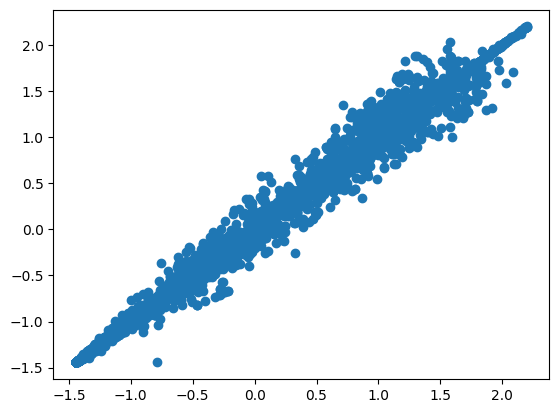

In [7]:
prediction=model.predict(xtest)
plt.scatter(ytest,prediction)

print(accuracy(ytest, prediction,0.001 ))

In [ ]:
parameters={
    "splitter":["best","random"],
    "max_depth" : [1,3,5,7,9,11,12],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "max_features":[1.0,"log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}

In [ ]:
from sklearn.model_selection import GridSearchCV; 

tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=3, n_jobs=-1,verbose=2)

tuning_model.fit(x, y)

In [ ]:
print(tuning_model)
print("BEST: ",tuning_model.best_params_, tuning_model.best_score_)
results = pd.DataFrame(tuning_model.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
configs = results[:15]["params"].to_numpy().tolist()
configs = json.dumps(configs)
print(configs)

file = open("data/dtr_cfgs.json", "w+")
content = str(configs)
file.write(content)
file.close()

In [ ]:
# RUN FROM HERE
file = open("data/dtr_cfgs.json", "r")
content = file.read()
file.close()
configs = json.loads(content); 

for dict in configs:
    for key,value in enumerate(dict):
        if value=="null": 
            dict[key] = None; 

In [ ]:
table = [0 for _ in range(len(configs))]

# configs.append({})
for index,config in enumerate(configs):
    print(f"Running: {config}")
    tmodel = DecisionTreeRegressor(**config); 
    tmodel.fit(xtrain,ytrain); 

    yhat = tmodel.predict(xtest)

    accuracies = list(map(
        lambda x: accuracy(yhat, ytest, x)
    ,[0.001, 0.01, 0.1])) 
    predicted = tmodel.predict(xtest)
    print(
        ytest.shape,    
        predicted.shape
    )

    table[index] = row(json.dumps(config), ytest.reshape(-1), predicted, accuracies)

table = pd.DataFrame(table, columns=["","R2","MAE", "MSE","Acc@0.1%", "Acc@1%", "Acc@10%"]); 
table

In [ ]:
table = [0]

model = DecisionTreeRegressor(**config); 
model.fit(xtrain,ytrain); 

yhat = model.predict(xtest)

accuracies = list(map(
    lambda x: accuracy(yhat, ytest, x)
,[0.001, 0.01, 0.1])) 
print(f"Accuracies: {accuracies}")
table[0] = row(json.dumps(config), ytest.reshape(-1) , model.predict(xtest), accuracies)


In [ ]:
print(xtrain.keys())
plt.hist(xtrain["Vessel Volume(V:L)"], bins=100)


In [ ]:
plt.hist(yhat, bins=100)


In [ ]:
plt.hist(ytest, bins=100)